# 短程-建立模型-最低價格天數

**線性模型**

In [1]:
import re
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# 讀取數據
file_path = '/Users/yuchingchen/Documents/專題/cleaned_data/short_flight_final.csv'
data = pd.read_csv(file_path)

# 將「飛行時間」轉換為分鐘數
def convert_flight_time_to_minutes(time_str):
    if isinstance(time_str, str):  # 確保是字串才處理
        # 使用正則表達式提取小時和分鐘
        match = re.match(r'(\d+) 小時(?: (\d+) 分鐘)?', time_str)
        if match:
            hours = int(match.group(1))
            minutes = int(match.group(2)) if match.group(2) else 0
            return hours * 60 + minutes
    return None  # 如果不是字串或無法解析則返回 None

data['飛行時間_分鐘'] = data['飛行時間'].apply(convert_flight_time_to_minutes)

# 轉換日期格式
data['出發日期'] = pd.to_datetime(data['出發日期'])

# 對以下欄位進行 one-hot encoding（drop_first 用來避免共線性）
categorical_cols = ['星期', '出發時段', '出發機場代號', '抵達時段', '抵達機場代號',
                    '航空公司', '航空聯盟', '是否過夜', '機型', '機型分類', '艙等', '假期', 'Region']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# 數值型特徵處理
num_cols = ['飛行時間_分鐘', 'Cost of Living Index', 'GDP (PPP) per capita (in thousand USD)']
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

# ==========================================
# 選取建模時使用的特徵：
# 我們要使用與「出發時段」、「抵達時段」、「航空聯盟」、「機型分類」、「假期」、「Region」相關的 dummy 變數
# 以及數值特徵「飛行時間_分鐘」、「Cost of Living Index」、「GDP (PPP) per capita (in thousand USD)」
# ==========================================

# 找出所有欄位名稱中包含目標關鍵字的 dummy 變數
target_keywords = ['出發時段_', '抵達時段_', '航空聯盟_', '機型分類_', '假期_', 'Region_']

dummy_cols = [col for col in data.columns if any(keyword in col for keyword in target_keywords)]

# 最後的特徵欄位：dummy 變數 + 數值特徵
feature_cols = dummy_cols + ['飛行時間_分鐘', 'Cost of Living Index', 'GDP (PPP) per capita (in thousand USD)']

# 檢查選取的特徵
print("選取的特徵欄位:", feature_cols)

# 定義自變數與目標變數
X = data[feature_cols]
y = data["最低價格天數"]

# 分割數據集（訓練集與測試集）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 建立線性回歸模型
model = LinearRegression()
model.fit(X_train, y_train)

# 模型預測
y_pred = model.predict(X_test)

# 模型評估
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("測試集 MSE:", mse)
print("測試集 R^2:", r2)

# 產出模型公式
intercept = model.intercept_
coefficients = model.coef_
features = X.columns

formula = "平均價格_log = {:.3f}".format(intercept)
for coef, feat in zip(coefficients, features):
    formula += " + ({:.3f} * {})".format(coef, feat)
print("模型公式:")
print(formula)

選取的特徵欄位: ['出發時段_下午班機', '出發時段_凌晨班機', '出發時段_早晨班機', '出發時段_晚間班機', '抵達時段_下午抵達', '抵達時段_凌晨抵達', '抵達時段_早晨抵達', '抵達時段_晚間抵達', '航空聯盟_1', '航空聯盟_2', '航空聯盟_3', '航空聯盟_4', '機型分類_0', '機型分類_1', '機型分類_2', '假期_1', 'Region_日本', 'Region_泰國', 'Region_韓國', 'Region_香港', '飛行時間_分鐘', 'Cost of Living Index', 'GDP (PPP) per capita (in thousand USD)']
測試集 MSE: 477.31931115164974
測試集 R^2: 0.12040722261902392
模型公式:
平均價格_log = -371840121937654.750 + (-5.174 * 出發時段_下午班機) + (-6.774 * 出發時段_凌晨班機) + (1.902 * 出發時段_早晨班機) + (-4.255 * 出發時段_晚間班機) + (5.915 * 抵達時段_下午抵達) + (9.007 * 抵達時段_凌晨抵達) + (9.090 * 抵達時段_早晨抵達) + (8.933 * 抵達時段_晚間抵達) + (-10.399 * 航空聯盟_1) + (-16.947 * 航空聯盟_2) + (-9.540 * 航空聯盟_3) + (-2.141 * 航空聯盟_4) + (-5.042 * 機型分類_0) + (-2.207 * 機型分類_1) + (-12.171 * 機型分類_2) + (12.812 * 假期_1) + (348190000279221.938 * Region_日本) + (427758432620580.500 * Region_泰國) + (422924167033717.188 * Region_韓國) + (444346556021589.500 * Region_香港) + (-3.716 * 飛行時間_分鐘) + (-142165331339245.000 * Cost of Living Index) + (208501938838053.000 * GDP (P

In [2]:
import re
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# 讀取數據
file_path = '/Users/yuchingchen/Documents/專題/cleaned_data/short_flight_final.csv'
data = pd.read_csv(file_path)

# 將「飛行時間」轉換為分鐘數
def convert_flight_time_to_minutes(time_str):
    if isinstance(time_str, str):  # 確保是字串才處理
        match = re.match(r'(\d+) 小時(?: (\d+) 分鐘)?', time_str)
        if match:
            hours = int(match.group(1))
            minutes = int(match.group(2)) if match.group(2) else 0
            return hours * 60 + minutes
    return None  # 如果不是字串或無法解析則返回 None

data['飛行時間_分鐘'] = data['飛行時間'].apply(convert_flight_time_to_minutes)

# 轉換日期格式
data['出發日期'] = pd.to_datetime(data['出發日期'])

# One-hot encoding
categorical_cols = ['星期', '出發時段', '出發機場代號', '抵達時段', '抵達機場代號',
                    '航空公司', '航空聯盟', '是否過夜', '是否為平日', '機型', '機型分類', '艙等', '假期', 'Region']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# 數值型特徵標準化
num_cols = ['飛行時間_分鐘', 'Cost of Living Index', 'GDP (PPP) per capita (in thousand USD)']
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

# 選取建模特徵
target_keywords = ['出發時段_', '抵達時段_', '航空聯盟_', '機型分類_', '是否為平日_', '假期_', 'Region_']
dummy_cols = [col for col in data.columns if any(keyword in col for keyword in target_keywords)]
feature_cols = dummy_cols + ['飛行時間_分鐘', 'Cost of Living Index', 'GDP (PPP) per capita (in thousand USD)']

# 定義自變數與目標變數
X = data[feature_cols]
y = data["最低價格天數"]

# 設定五組隨機種子
seeds = [123, 234, 345, 456, 567]
results = []

for seed in seeds:
    # 分割數據集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

    # 建立線性回歸模型
    model = LinearRegression()
    model.fit(X_train, y_train)

    # 預測
    y_pred = model.predict(X_test)

    # 評估
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # 儲存結果
    results.append({'Seed': seed, 'MSE': mse, 'R^2': r2})

# 轉換為 DataFrame 並顯示
results_df = pd.DataFrame(results)
print(results_df)

   Seed         MSE       R^2
0   123  476.022919  0.142337
1   234  464.482809  0.125905
2   345  470.223997  0.158215
3   456  465.955553  0.131309
4   567  476.306648  0.148638


**隨機森林**

Fitting 3 folds for each of 10 candidates, totalling 30 fits
最佳參數: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 30}
最佳 R²: 0.5069793052458397

測試集結果：
MSE: 258.4002694030201
R²: 0.5238260733851112


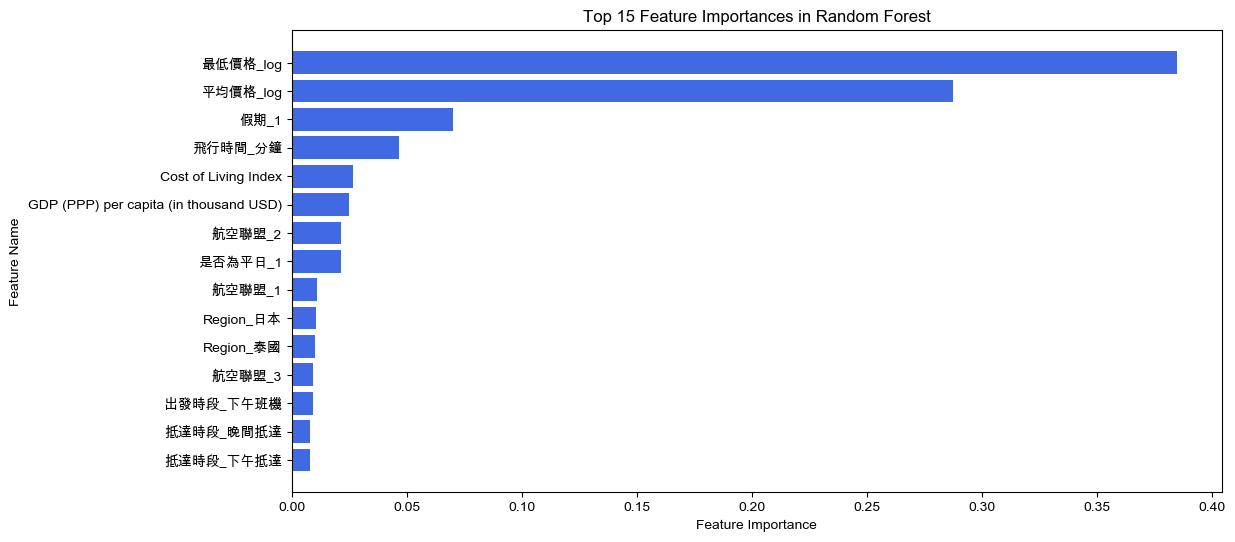

In [33]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# 繁體中文設定
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

# **1. 讀取數據**
file_path = '/Users/yuchingchen/Documents/專題/cleaned_data/short_flight_final.csv'
data = pd.read_csv(file_path)

# **2. 轉換「飛行時間」為分鐘數**
def convert_flight_time_to_minutes(time_str):
    if isinstance(time_str, str):  # 確保是字串才處理
        match = re.match(r'(\d+) 小時(?: (\d+) 分鐘)?', time_str)
        if match:
            hours = int(match.group(1))
            minutes = int(match.group(2)) if match.group(2) else 0
            return hours * 60 + minutes
    return None  # 如果不是字串或無法解析則返回 None

data['飛行時間_分鐘'] = data['飛行時間'].apply(convert_flight_time_to_minutes)
data = data.drop(columns=['飛行時間'])  # 移除原始 "飛行時間" 欄位

# **3. 類別變數進行 One-Hot Encoding**
categorical_cols = ['星期', '出發時段', '出發機場代號', '抵達時段', '抵達機場代號',
                    '航空公司', '航空聯盟', '是否過夜', '是否為平日', '機型', '機型分類', '艙等', '假期', 'Region']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# **4. 數值標準化**
num_cols = ['平均價格_log', '最低價格_log', '飛行時間_分鐘', 'Cost of Living Index', 'GDP (PPP) per capita (in thousand USD)']
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

# **5. 選取建模特徵**
target_keywords = ['出發時段_', '抵達時段_', '航空聯盟_', '機型分類_', '是否為平日_', '假期_', 'Region_']
dummy_cols = [col for col in data.columns if any(keyword in col for keyword in target_keywords)]
feature_cols = dummy_cols + ['平均價格_log', '最低價格_log', '飛行時間_分鐘', 'Cost of Living Index', 'GDP (PPP) per capita (in thousand USD)']

# **6. 定義自變數與目標變數**
X = data[feature_cols]
y = data["最低價格天數"]

# **7. 分割數據集（7:3 訓練集:測試集）**
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# **8. 設定隨機森林的超參數範圍**
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# **9. 使用 `RandomizedSearchCV` 進行超參數調整**
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=10, cv=3, scoring='r2', n_jobs=-1, verbose=1, random_state=42)
random_search.fit(X_train, y_train)

# **10. 獲取最佳參數**
best_params = random_search.best_params_
best_r2 = random_search.best_score_

print("最佳參數:", best_params)
print("最佳 R²:", best_r2)

# **11. 使用最佳參數訓練隨機森林**
best_rf = RandomForestRegressor(**best_params, random_state=42, n_jobs=-1)
best_rf.fit(X_train, y_train)

# **12. 預測與評估**
y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n測試集結果：")
print("MSE:", mse)
print("R²:", r2)

# **13. 計算特徵重要性**
feature_importances = best_rf.feature_importances_
feature_names = X_train.columns

# **14. 創建 DataFrame 來排序特徵重要性**
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# **15. 畫出特徵重要性圖**
plt.figure(figsize=(12, 6))
plt.barh(importance_df['Feature'][:15], importance_df['Importance'][:15], color='royalblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Top 15 Feature Importances in Random Forest')
plt.gca().invert_yaxis()  # 讓最重要的變數在最上方
plt.show()

**SVM**

In [4]:
import re
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# 讀取數據
file_path = '/Users/yuchingchen/Documents/專題/cleaned_data/short_flight_final.csv'
data = pd.read_csv(file_path)

# 將「飛行時間」轉換為分鐘數
def convert_flight_time_to_minutes(time_str):
    if isinstance(time_str, str):  # 確保是字串才處理
        match = re.match(r'(\d+) 小時(?: (\d+) 分鐘)?', time_str)
        if match:
            hours = int(match.group(1))
            minutes = int(match.group(2)) if match.group(2) else 0
            return hours * 60 + minutes
    return None  # 如果不是字串或無法解析則返回 None

data['飛行時間_分鐘'] = data['飛行時間'].apply(convert_flight_time_to_minutes)

# 轉換日期格式
data['出發日期'] = pd.to_datetime(data['出發日期'])

# One-hot encoding
categorical_cols = ['星期', '出發時段', '出發機場代號', '抵達時段', '抵達機場代號',
                    '航空公司', '航空聯盟', '是否過夜', '是否為平日', '機型', '機型分類', '艙等', '假期', 'Region']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# 數值型特徵標準化（SVM 需要標準化）
num_cols = ['飛行時間_分鐘', 'Cost of Living Index', 'GDP (PPP) per capita (in thousand USD)']
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

# 選取建模特徵
target_keywords = ['出發時段_', '抵達時段_', '航空聯盟_', '機型分類_', '是否為平日_', '假期_', 'Region_']
dummy_cols = [col for col in data.columns if any(keyword in col for keyword in target_keywords)]
feature_cols = dummy_cols + ['飛行時間_分鐘', 'Cost of Living Index', 'GDP (PPP) per capita (in thousand USD)']

# 定義自變數與目標變數
X = data[feature_cols]
y = data["中位數價格_log"]

# 設定五組隨機種子
seeds = [123, 234, 345, 456, 567]
results = []

for seed in seeds:
    # 分割數據集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

    # 建立 SVR 模型
    model = SVR(kernel='rbf', C=1.0, epsilon=0.1)  # RBF 核函數
    model.fit(X_train, y_train)

    # 預測
    y_pred = model.predict(X_test)

    # 評估
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # 儲存結果
    results.append({'Seed': seed, 'MSE': mse, 'R^2': r2})

# 轉換為 DataFrame 並顯示
results_df = pd.DataFrame(results)
print(results_df)

   Seed       MSE       R^2
0   123  0.073681  0.772824
1   234  0.075996  0.774872
2   345  0.078509  0.757709
3   456  0.077242  0.766548
4   567  0.086780  0.743345


**XGBoost**

In [5]:
import re
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# 讀取數據
file_path = '/Users/yuchingchen/Documents/專題/cleaned_data/short_flight_final.csv'
data = pd.read_csv(file_path)

# 將「飛行時間」轉換為分鐘數
def convert_flight_time_to_minutes(time_str):
    if isinstance(time_str, str):  # 確保是字串才處理
        match = re.match(r'(\d+) 小時(?: (\d+) 分鐘)?', time_str)
        if match:
            hours = int(match.group(1))
            minutes = int(match.group(2)) if match.group(2) else 0
            return hours * 60 + minutes
    return None  # 如果不是字串或無法解析則返回 None

data['飛行時間_分鐘'] = data['飛行時間'].apply(convert_flight_time_to_minutes)

# 轉換日期格式
data['出發日期'] = pd.to_datetime(data['出發日期'])

# One-hot encoding
categorical_cols = ['星期', '出發時段', '出發機場代號', '抵達時段', '抵達機場代號',
                    '航空公司', '航空聯盟', '是否過夜', '是否為平日', '機型', '機型分類', '艙等', '假期', 'Region']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# 數值型特徵標準化（XGBoost **不一定** 需要標準化，但可以做）
num_cols = ['飛行時間_分鐘', 'Cost of Living Index', 'GDP (PPP) per capita (in thousand USD)']
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

# 選取建模特徵
target_keywords = ['出發時段_', '抵達時段_', '航空聯盟_', '機型分類_', '是否為平日_', '假期_', 'Region_']
dummy_cols = [col for col in data.columns if any(keyword in col for keyword in target_keywords)]
feature_cols = dummy_cols + ['飛行時間_分鐘', 'Cost of Living Index', 'GDP (PPP) per capita (in thousand USD)']

# 定義自變數與目標變數
X = data[feature_cols]
y = data["中位數價格_log"]

# 設定五組隨機種子
seeds = [123, 234, 345, 456, 567]
results = []

for seed in seeds:
    # 分割數據集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

    # 建立 XGBoost 模型
    model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=seed, n_jobs=-1)
    model.fit(X_train, y_train)

    # 預測
    y_pred = model.predict(X_test)

    # 評估
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # 儲存結果
    results.append({'Seed': seed, 'MSE': mse, 'R^2': r2})

# 轉換為 DataFrame 並顯示
results_df = pd.DataFrame(results)
print(results_df)

   Seed       MSE       R^2
0   123  0.072718  0.775791
1   234  0.074459  0.779423
2   345  0.078254  0.758495
3   456  0.077958  0.764383
4   567  0.086050  0.745503
